In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
data=pd.read_csv('HW.csv')

In [4]:
data.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [5]:
data=data.drop('Index',axis=1)

In [6]:
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [7]:
data.shape

(25000, 2)

In [8]:
data.describe()

,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


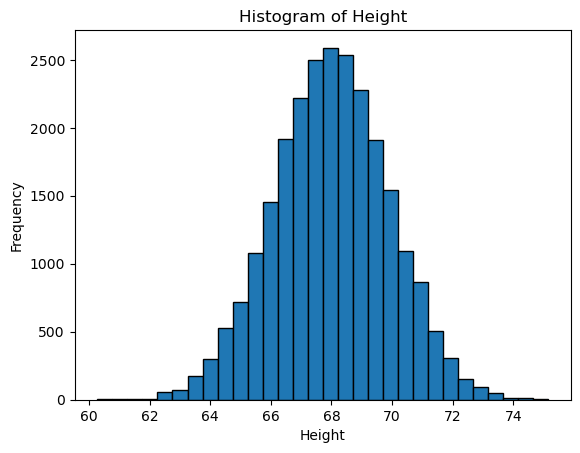

In [9]:
import matplotlib.pyplot as plt


plt.hist(data['Height(Inches)'], bins=30, edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height')
plt.ylabel('Frequency')
plt.show()

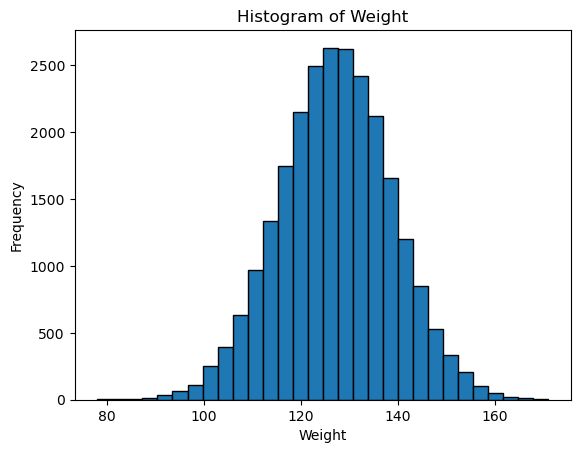

In [10]:

plt.hist(data['Weight(Pounds)'], bins=30, edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.show()

In [11]:
data.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler=MinMaxScaler()

In [14]:
data_scaled=scaler.fit_transform(data)

In [15]:
data_scaled=pd.DataFrame(data_scaled)

In [16]:
data_scaled

,0,1
0,0.370095,0.376472
1,0.755447,0.629351
2,0.613158,0.807370
3,0.533683,0.692295
4,0.504856,0.713410
...,...,...
24995,0.620110,0.430705
24996,0.287063,0.453975
24997,0.297167,0.433226
24998,0.487468,0.583940


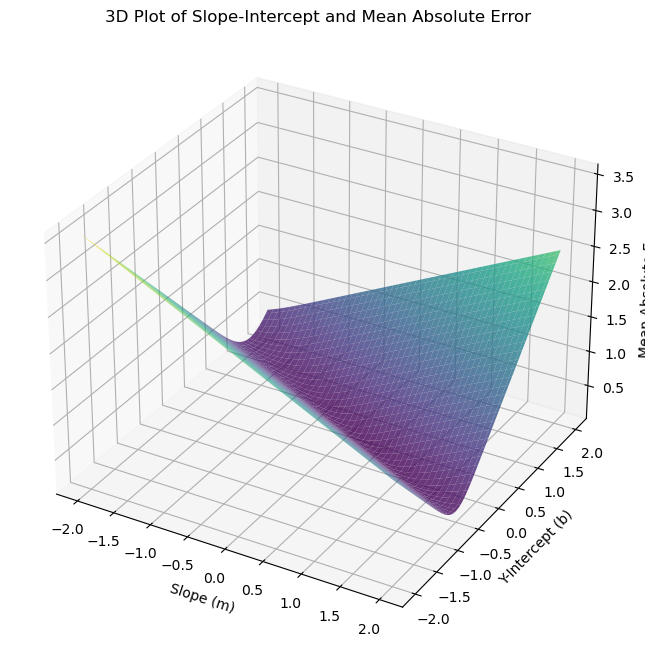

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Sample data
x_data = np.array(data_scaled[0])
y_data = np.array(data_scaled[1])

# Function to calculate absolute loss
def absolute_loss(m, b, x, y):
    predictions = m * x + b
    loss = np.mean(np.abs(predictions - y))  # Calculate mean absolute error
    return loss

# Generate 3D data for slope (m) and y-intercept (b)
m_values = np.linspace(-2, 2, 100)
b_values = np.linspace(-2, 2, 100)
m_values, b_values = np.meshgrid(m_values, b_values)

# Calculate absolute loss for each combination of m and b
loss_values = np.zeros_like(m_values)

for i in range(m_values.shape[0]):
    for j in range(m_values.shape[1]):
        loss_values[i, j] = absolute_loss(m_values[i, j], b_values[i, j], x_data, y_data)

# Plot 3D graph
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(m_values, b_values, loss_values, cmap='viridis', alpha=0.8)
ax.set_xlabel('Slope (m)')
ax.set_ylabel('Y-Intercept (b)')
ax.set_zlabel('Mean Absolute Error')
ax.set_title('3D Plot of Slope-Intercept and Mean Absolute Error')

plt.show()


In [18]:
import tensorflow as tf
model_ADAM = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [19]:
model_ADAM.compile(optimizer='adam', loss='mean_absolute_error')

In [20]:
model_ADAM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [21]:
history_ADAM= model_ADAM.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20

782/782 [==============================] - 3s 2ms/step - loss: 0.6849
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1395
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1255
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1131
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.1013
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0931
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0889
Epoch 8/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0873
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0867
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 12/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 13/20
782/782 [===

In [22]:
weights, bias = model_ADAM.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[0.48508534]]
Trained Bias: [0.2676841]


In [23]:
model_rmsprop = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [24]:
model_rmsprop.compile(optimizer='rmsprop', loss='mean_absolute_error')

In [25]:
history_rmsprop= model_rmsprop.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 2s 3ms/step - loss: 0.1074
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0869
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0867
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0866
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 11/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0866
Epoch 12/20
782/782 [==============================] - 2s 3ms/step - loss: 0.0866
Epoch 13/20
782/782 [====

In [26]:
weights, bias = model_rmsprop.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[0.49070853]]
Trained Bias: [0.27502614]


In [27]:
model_SGD = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [28]:
model_SGD.compile(optimizer='SGD', loss='mean_absolute_error')

In [29]:
history_SGD= model_SGD.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 3s 3ms/step - loss: 0.0946
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0887
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0871
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0868
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 12/20
782/782 [==============================] - 2s 2ms/step - loss: 0.0866
Epoch 13/20
782/782 [====

In [30]:
weights, bias = model_SGD.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[0.489256]]
Trained Bias: [0.27937487]


In [31]:
model_Adagrad = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [32]:
model_Adagrad.compile(optimizer='Adagrad', loss='mean_absolute_error')

In [33]:
history_Adagrad= model_Adagrad.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 2s 2ms/step - loss: 1.0926
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 1.0457
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 1.0152
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.9905
Epoch 5/20
782/782 [==============================] - 2s 3ms/step - loss: 0.9692
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 0.9501
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.9328
Epoch 8/20
782/782 [==============================] - 2s 2ms/step - loss: 0.9167
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 0.9017
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 0.8875
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 0.8741
Epoch 12/20
782/782 [==============================] - 2s 2ms/step - loss: 0.8613
Epoch 13/20
782/782 [====

In [34]:
weights, bias = model_Adagrad.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[-0.9445361]]
Trained Bias: [0.24851869]


In [35]:
model_Adadelta = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(units=1)
])

In [36]:
model_Adadelta.compile(optimizer='Adadelta', loss='mean_absolute_error')

In [37]:
history_Adadelta= model_Adadelta.fit(data_scaled[0],data_scaled[1], epochs=20)

Epoch 1/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3180
Epoch 2/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3154
Epoch 3/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3120
Epoch 4/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3082
Epoch 5/20
782/782 [==============================] - 2s 2ms/step - loss: 0.3039
Epoch 6/20
782/782 [==============================] - 2s 2ms/step - loss: 0.2992
Epoch 7/20
782/782 [==============================] - 2s 2ms/step - loss: 0.2943
Epoch 8/20
782/782 [==============================] - 2s 3ms/step - loss: 0.2891
Epoch 9/20
782/782 [==============================] - 2s 2ms/step - loss: 0.2837
Epoch 10/20
782/782 [==============================] - 2s 2ms/step - loss: 0.2782
Epoch 11/20
782/782 [==============================] - 2s 2ms/step - loss: 0.2726
Epoch 12/20
782/782 [==============================] - 2s 2ms/step - loss: 0.2669
Epoch 13/20
782/782 [====

In [38]:
weights, bias = model_Adadelta.get_weights()
print("Trained Weights:", weights)
print("Trained Bias:", bias)

Trained Weights: [[1.543589]]
Trained Bias: [-0.07360981]


In [39]:
training_histories = [history_ADAM,history_rmsprop,history_SGD,history_Adagrad,history_Adadelta]

In [40]:
optimizers_list=['ADAM','rmsprop','SGD','Adagrad','Adadelta']

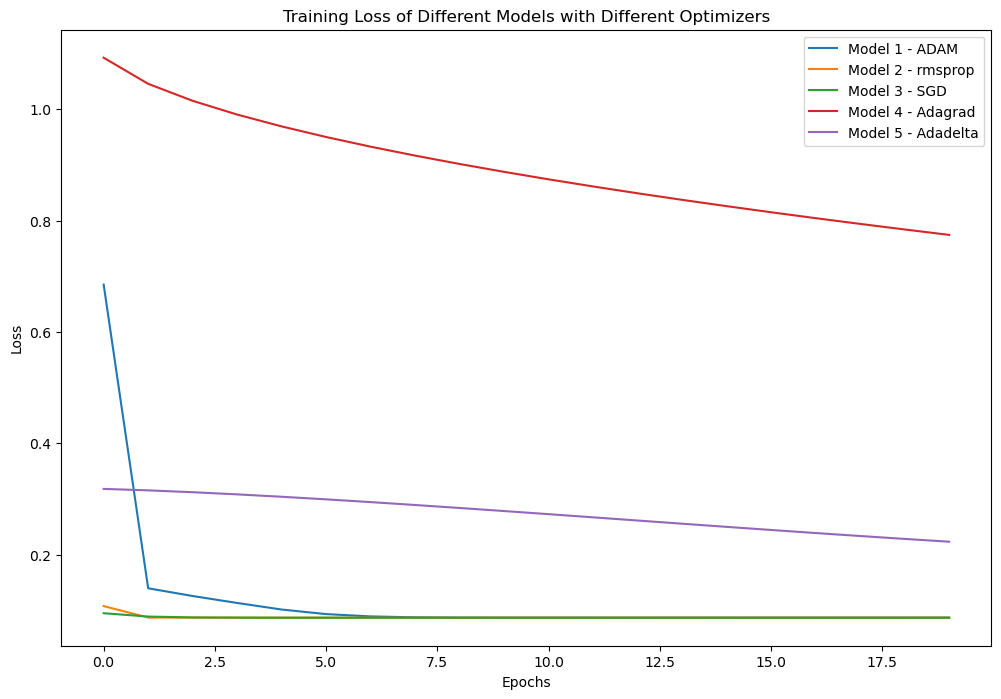

In [41]:
plt.figure(figsize=(12, 8))
for i, history in enumerate(training_histories):
    plt.plot(history.history['loss'], label=f'Model {i + 1} - {optimizers_list[i]}')

plt.title('Training Loss of Different Models with Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()